# CONSTRUÇÃO DE FEIXES ELEMENTARES

Alguns feixes comumente utilizados em laboratório possuem construtores pré-implementados pelo submódulo `optical.beam`. Esses apresentam argumentos opcionais idênticos ao do método `optical.beam.create`, em excessão de `coordinate_system`, além disso, as funções $\psi_{z = 0}(\mathbf{r})$ não precisam mais ser informadas, sendo necessária apenas a passagem de parâmetros que a define para cada tipo de feixe.

In [1]:
# muda o diretório, sem output, para computational-beam-optics/
%cd -q ../../

# módulo optical.beam: construtores de perfis iniciais
from optical import beam
# módulo matplotlib.pyplot: construção de representações gráficas
import matplotlib.pyplot as plt     # importa pyplot como "plt"
# módulo numpy: computação geral de matrizes
import numpy as np                  # importa numpy como "np"

# construção da partição dos eixos do plano transversal
x = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500 pontos
y = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500 pontos

# construção da malha de pontos
X, Y = np.meshgrid(x, y);           # malha de pontos do plano

## PERFIL DE ENTRADA DE UM FEIXE GAUSSIANO

Um perfil de entrada gaussiano consiste na condição de contorno em $z = 0$ $\mu{m}$ de um feixe gaussiano no espaço livre
$$
    \psi_{z = 0}(r) = A\operatorname{exp}[-(r/w_0)^2]\text{,}
$$
onde observamos que o parâmetro $w_0$ (cintura do perfil gaussiano) é o único parâmetro que altera a forma da função. Para construir um perfil gaussiano de entrada, assim, informamos apenas a sua cintura (a amplitude $A$ pode ser inserida por uma simples multiplicação) e a região onde desejamos computá-lo.

> `optical.beam.create_G(w0, region = (X, Y))`
>
> > computa um perfil de entrada gaussiano.

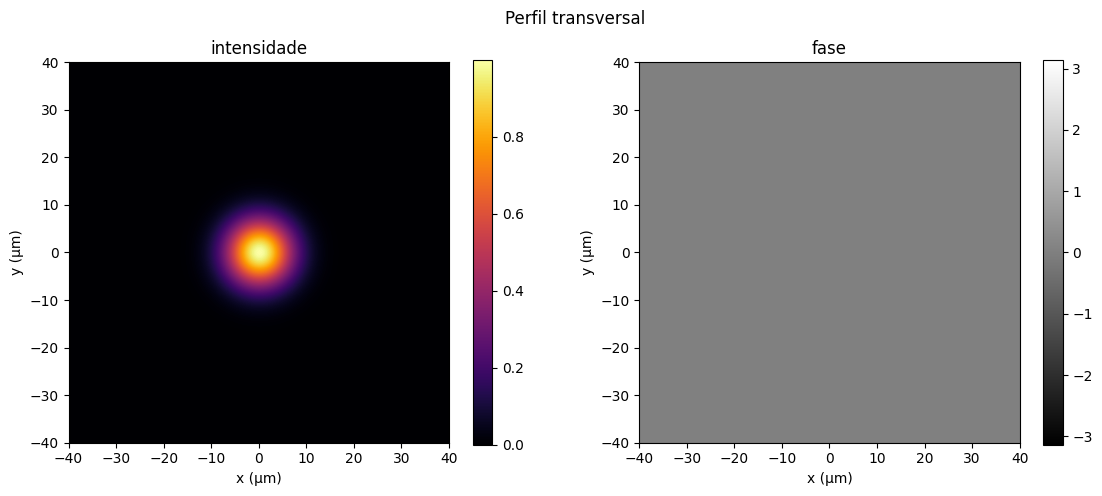

In [2]:
# exibe as imagens geradas em linha
%matplotlib inline

# criação de um feixe gaussiano
psi_0 = beam.create_G(w0 = 10., region = (X, Y));

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

## PERFIL DE ENTRADA DE UM FEIXE HERMITE-GAUSS

Um perfil de entrada do tipo hermite-gauss consiste na condição de contorno em $z = 0$ $\mu{m}$ de um feixe hermite-gauss no espaço livre
$$
    \psi_{z = 0}(x,y) = A\mathrm{H}_l(\sqrt{2}x/w_0)\mathrm{H}_l(\sqrt{2}y/w_0)\operatorname{exp}(-(x^2 + y^2)/w_0^2)\text{,}
$$
onde $\mathrm{H}_i$ é o $i$-ésimo polinômio de Hermite. Aqui observamos que além do parâmetro $w_0$, os índices $l$ e $m$ dos polinômios de Hermite desempenham papel fundamental na definição da forma da função. Para construir um perfil hermite-gauss de entrada, assim, informamos a sua cintura, seus índices (a amplitude $A$ pode ser inserida por uma simples multiplicação) e a região onde desejamos computá-lo.

> `optical.beam.create_HG(w0, indices = (l, m) , region = (X, Y))`
>
> > computa um perfil de entrada do tipo hermite-gauss.

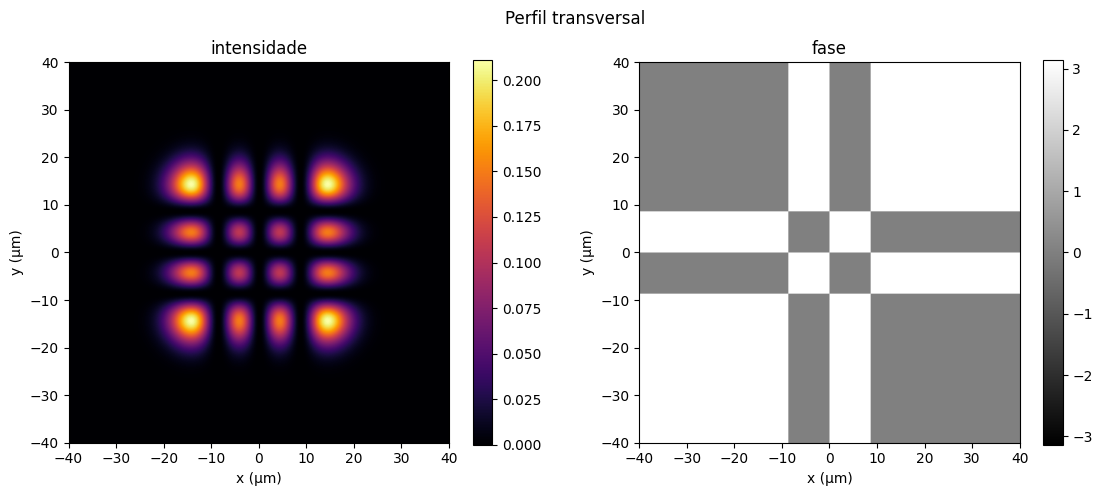

In [3]:
# exibe as imagens geradas em linha
%matplotlib inline

# criação de um feixe hermite-gauss
psi_0 = beam.create_HG(w0 = 10., indices = (3, 3), region = (X, Y));

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

## PERFIL DE ENTRADA DE UM FEIXE LAGUERRE-GAUSS

Um perfil de entrada do tipo laguerre-gauss consiste na condição de contorno em $z = 0$ $\mu{m}$ de um feixe laguerre-gauss no espaço livre
$$
    \psi_{z = 0}(r,\phi) = A(r/w_0)^l\mathrm{L}_m^l(2(r/w_0)^2)\operatorname{exp}(-(r/w_0)^2)\operatorname{exp}(-\imath\phi)\text{,}
$$
onde $\mathrm{L}_m^l$ sendo o polinômio generalizado de Laguerre. Aqui observamos que além do parâmetro $w_0$, os índices $l$ (azimutal)  e $m$ (radial) influenciam na definição da forma da função. Para construir um perfil laguerre-gauss de entrada, assim, informamos a sua cintura, seus índices azimutal e radial (a amplitude $A$ pode ser inserida por uma simples multiplicação) e a região onde desejamos computá-lo.

> `optical.beam.create_LG(w0, indices = (l, m) , region = (X, Y))`
>
> > computa um perfil de entrada do tipo laguerre-gauss.

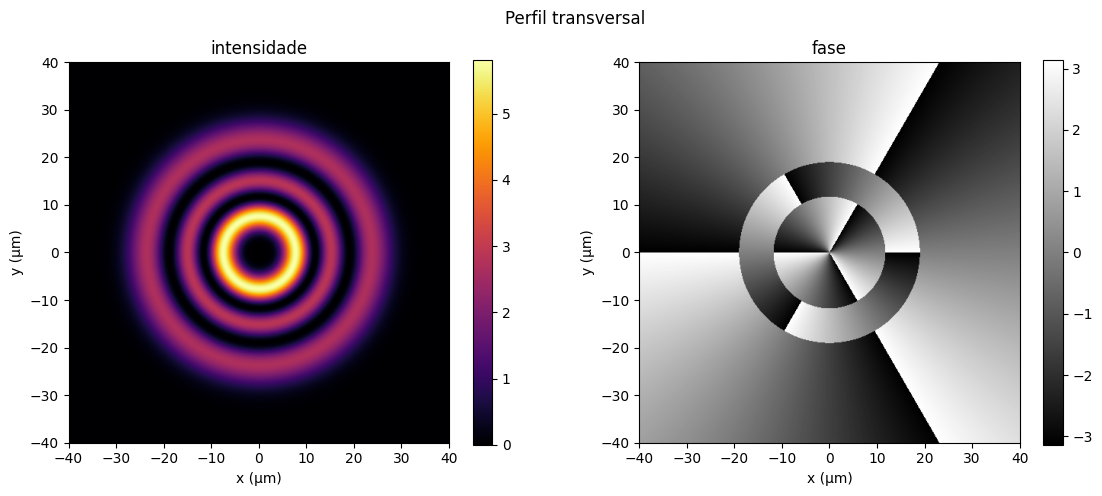

In [4]:
# exibe as imagens geradas em linha
%matplotlib inline

# criação de um feixe laguerre-gauss
psi_0 = beam.create_LG(w0 = 10., indices = (3, 2), region = (X, Y));

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

## PERFIL DE ENTRADA DE UM FEIXE BESSEL

Um perfil de entrada do tipo bessel consiste na condição de contorno em $z = 0$ $\mu{m}$ de um feixe bessel no espaço livre
$$
    \psi_{z = 0}(r,\phi) = A\mathrm{J}_m(k_t{r})\operatorname{exp}(im\phi)\text{,}
$$
onde $\mathrm{J}_m$ sendo a função de Bessel de primeiro tipo de $m$-ésima ordem. Aqui observamos que os parâmetros $k_t$ e a ordem $m$ da função de Bessel são os únicos que influenciam na definição da forma da função. Para construir um perfil bessel de entrada, assim, informamos o seu parâmetro $k_t$ e sua ordem $m$ (a amplitude $A$ pode ser inserida por uma simples multiplicação) e a região onde desejamos computá-lo.

> `optical.beam.create_J(k_t, m , region = (X, Y))`
>
> > computa um perfil de entrada do tipo bessel.

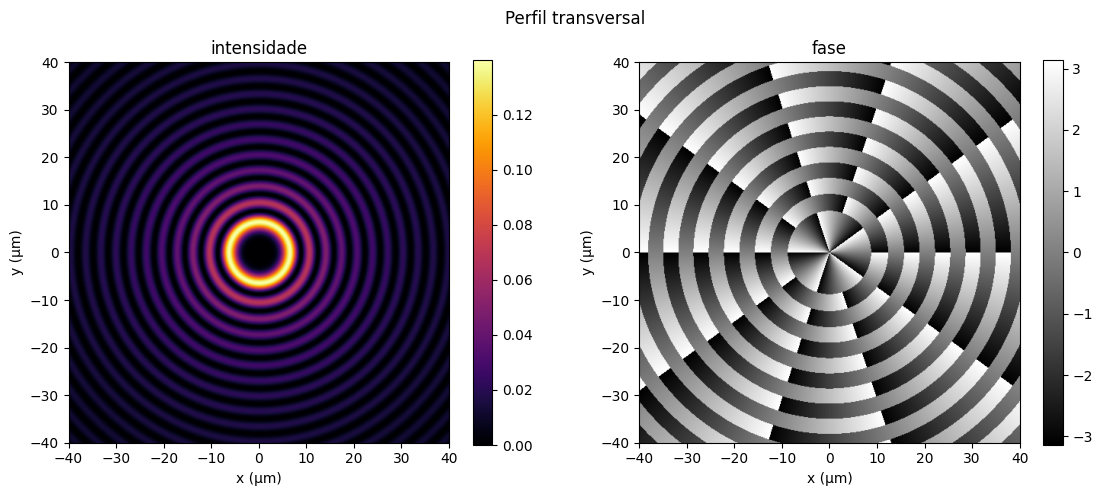

In [5]:
# exibe as imagens geradas em linha
%matplotlib inline

# criação de um feixe bessel
psi_0 = beam.create_J(k_t = 1., m = 5, region = (X, Y));

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');